**The objective** of this project is to analyze the factors influencing graduate school admissions and to build a linear regression model that predicts a student’s Chance of Admit based on academic performance, standardized test scores, and qualitative factors such as SOP, LOR, and research experience. The study also aims to evaluate the assumptions of linear regression and compare regularized models such as Ridge and Lasso.

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### Understanding Dataset Shape and Structure

Before starting any analysis, we examine the shape and structure of the dataset to understand:
- Number of observations and features
- Data types of each column
- Whether the dataset is suitable for regression analysis

In [80]:
df=pd.read_csv('Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [81]:
df.shape

(500, 9)

In [82]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Data Quality Checks: Missing Values and Duplicates

To ensure reliable analysis, we check for:
- Missing values, as linear regression cannot handle nulls
- Duplicate records, which may bias the model

A clean dataset allows us to proceed confidently with exploratory analysis.

In [83]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [84]:
df.duplicated().sum()

np.int64(0)

In [85]:
df.columns = df.columns.str.strip()

In [86]:
df.drop('Serial No.',axis=1,inplace=True)

In [87]:
df.columns = df.columns.str.strip()

### Univariate Analysis: Distribution of Continuous Variables

Histograms are used to analyze the distribution of continuous variables such as:
- GRE Score
- TOEFL Score
- CGPA
- Chance of Admit

This helps identify skewness, spread, and whether the variables are suitable for linear modeling.

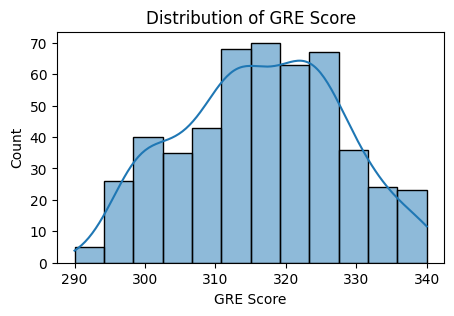

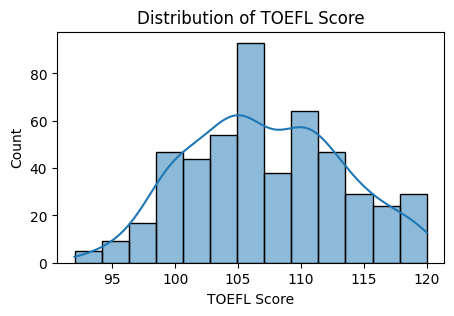

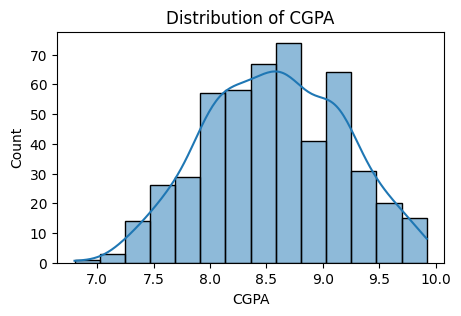

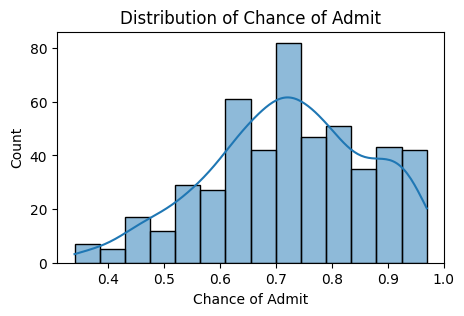

In [88]:
cont_vars = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']

for v in cont_vars:
    plt.figure(figsize=(5,3))
    sns.histplot(df[v], kde=True)
    plt.title(f'Distribution of {v}')
    plt.show()

GRE and TOEFL scores appear approximately normally distributed, indicating that applicants span a wide performance range. CGPA shows slight right skewness, suggesting more applicants with higher GPAs. Chance of Admit is also right-skewed, implying that a larger proportion of applicants have relatively higher admission probabilities.

University Rating is centered around mid-ranked universities (rating 3), indicating that most applicants apply to moderately ranked institutions. SOP and LOR scores are slightly skewed towards higher values (3.5–4), suggesting that applicants generally have strong qualitative profiles. Research experience is more common among applicants, as evidenced by a higher count of students with research experience (Research = 1).

The dataset contains 500 observations and 9 variables. There are no missing values or duplicate records, indicating good data quality. The unique identifier column has been removed to prevent model bias.

### Bivariate Analysis: Feature vs Target Relationship

Scatterplots are used to study the relationship between continuous predictors and the target variable (Chance of Admit).

This step helps visually assess:
- Direction of relationship
- Linearity
- Strength of association

These observations guide the suitability of linear regression.

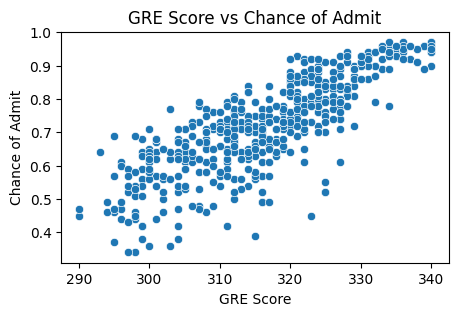

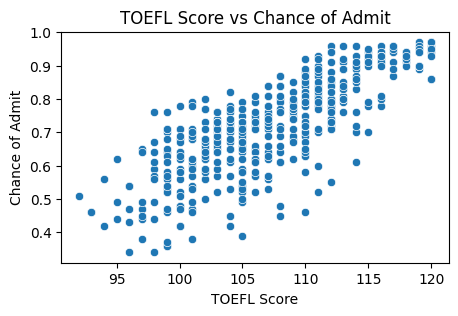

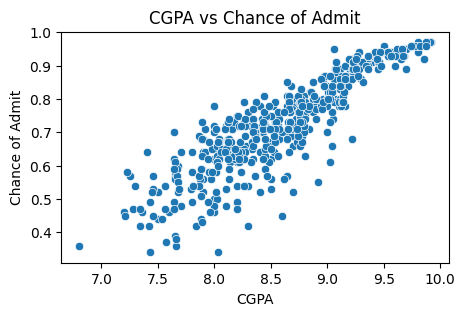

In [89]:
features=['GRE Score', 'TOEFL Score', 'CGPA']
for f in features:
          plt.figure(figsize=(5,3))
          sns.scatterplot(x=df[f],y=df['Chance of Admit'])
          plt.title(f'{f} vs Chance of Admit')
          plt.show()

GRE Score, TOEFL Score, and CGPA all show a clear positive linear relationship with Chance of Admit, indicating that higher academic performance is associated with higher admission probability. The absence of visible non-linear patterns supports the use of a linear regression model.

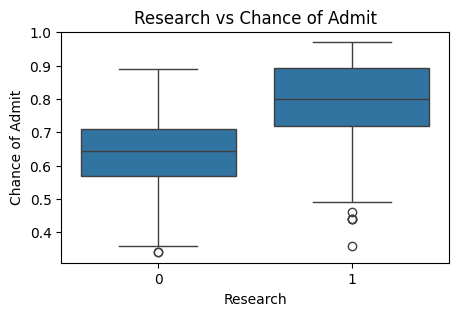

In [90]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df['Research'], y=df['Chance of Admit'])
plt.title('Research vs Chance of Admit')
plt.show()

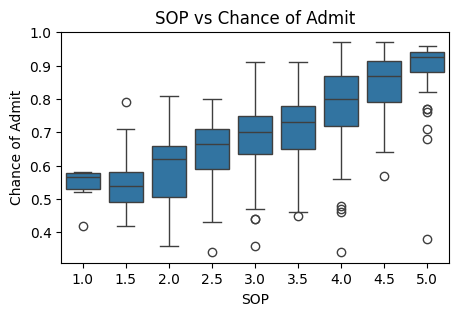

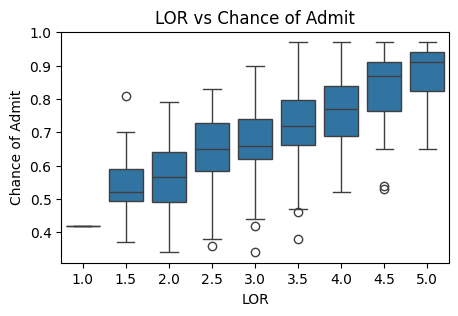

In [91]:
for v in ['SOP', 'LOR']:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[v], y=df['Chance of Admit'])
    plt.title(f'{v} vs Chance of Admit')
    plt.show()

Boxplots were used to compare the distribution of Chance of Admit across ordinal and categorical variables. Research experience shows a clear upward shift in median admission probability. SOP and LOR scores exhibit a monotonic increase in median Chance of Admit, although significant overlap indicates that qualitative factors alone are insufficient, reinforcing the need for a multivariate model.

GRE Score, TOEFL Score, and CGPA all show a clear positive linear relationship with Chance of Admit, indicating that higher academic performance is associated with higher admission probability. The absence of visible non-linear patterns supports the use of a linear regression model.

### Summary of Exploratory Data Analysis

Exploratory analysis indicates that:
- The dataset is clean and well-structured
- Academic variables show strong relationships with admission probability
- Some predictors are highly correlated with each other

Based on these insights, we proceed to build a linear regression model while carefully testing its assumptions.

### Correlation Analysis Among Variables

Correlation analysis is performed to understand the linear relationships:
- Between predictor variables
- Between predictors and the target variable (Chance of Admit)

This step helps identify:
- Strong predictors of admission probability
- Redundant features that may cause multicollinearity

In [92]:
corr_matrix = df.corr()
corr_matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


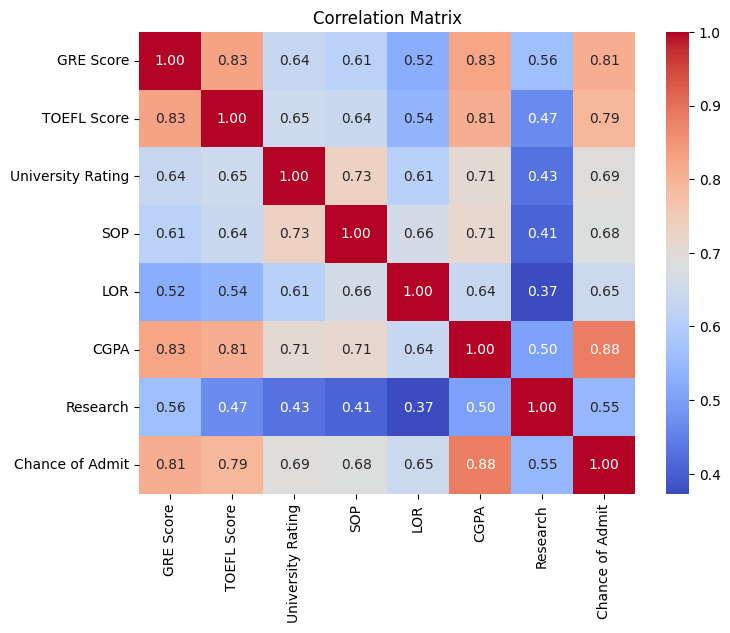

In [93]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix shows that GRE Score, TOEFL Score, and CGPA are highly correlated with each other, indicating potential multicollinearity among academic variables. CGPA shows the strongest positive correlation with Chance of Admit, followed by GRE and TOEFL scores. Qualitative factors such as SOP, LOR, and Research show moderate positive correlation with the target, suggesting that while academics dominate admission outcomes, profile-based factors also play a meaningful role. These observations justify further multicollinearity checks using VIF before finalizing the regression model.

### Preparing Data for Linear Regression

Before fitting a linear regression model, we separate the dataset into:
- Independent variables (X)
- Dependent variable (y: Chance of Admit)

This ensures a clear distinction between predictors and the target variable.

Variables such as SOP, LOR, and University Rating are ordinal in nature and carry meaningful numerical order. Hence, they were treated as numeric variables instead of applying one-hot encoding to preserve ordinal information and maintain interpretability.

In [94]:
# Ensure correct type
df[['University Rating','SOP','LOR','Research']] = df[['University Rating','SOP','LOR','Research']].astype(int)

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_s= df.drop('Chance of Admit', axis=1)
y_s = df['Chance of Admit']

Xs_train, Xs_test, ys_train, ys_test = train_test_split(
    X_s, y_s, test_size=0.3, random_state=42
)

lr = LinearRegression()
lr.fit(Xs_train, ys_train)

LinearRegression()

In [96]:
pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
5,CGPA,0.117016
6,Research,0.020713
4,LOR,0.013612
1,TOEFL Score,0.003417
2,University Rating,0.003105
0,GRE Score,0.002233
3,SOP,0.001951


Coefficients from the unscaled linear regression model were interpreted in terms of marginal effect within each variable, while relative importance across predictors was assessed using regularized models.

In [97]:
ys_train_pred = lr.predict(Xs_train)
ys_test_pred  = lr.predict(Xs_test)

In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def metrics(ys_true, ys_pred):
    return {
        "MAE": mean_absolute_error(ys_true, ys_pred),
        "RMSE": np.sqrt(mean_squared_error(ys_true, ys_pred)),
        "R2": r2_score(ys_true, ys_pred)
    }

print("Train Metrics:", metrics(ys_train, ys_train_pred))
print("Test Metrics :", metrics(ys_test, ys_test_pred))

Train Metrics: {'MAE': 0.04248667751619604, 'RMSE': np.float64(0.059499587470137984), 'R2': 0.8179887382419555}
Test Metrics : {'MAE': 0.04299841296018393, 'RMSE': np.float64(0.060684812599523394), 'R2': 0.8233070009592063}


The linear regression model shows strong and consistent performance, with R² ≈ 0.82 on both training and test data, indicating good explanatory power and no overfitting. CGPA has the highest positive marginal impact on admission chances, followed by research experience, while GRE and TOEFL contribute positively but with smaller marginal effects due to overlap with other academic indicators. SOP and LOR show weaker linear influence, reflecting their subjective nature. Overall, the model generalizes well and highlights academic consistency and research as key drivers of graduate admissions.

Modeling Approach

Scikit-learn was used for data splitting, preprocessing, and building regularized regression models (Ridge and Lasso) due to its efficient implementation and focus on predictive performance. Ordinary Least Squares (OLS) regression was implemented using the statsmodels library to obtain detailed statistical outputs such as coefficient estimates, p-values, confidence intervals, and diagnostic measures required for assumption testing and interpretability.

The OLS model was trained on the training dataset and used primarily for understanding the relationships between predictors and the target variable, while scikit-learn models were used to evaluate generalization performance on test data and to handle multicollinearity through regularization.

# Statsmodels
**Adding the Intercept Term**
requires explicitly adding a constant term to estimate the intercept of the regression model.

The intercept represents the baseline admission probability when all predictor values are zero.

In [99]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X = df.drop(columns=['Chance of Admit'])
y = df['Chance of Admit']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [101]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [102]:
ols_model = sm.OLS(y_train, X_train_sm).fit()

In [103]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     256.1
Date:                Thu, 29 Jan 2026   Prob (F-statistic):          5.91e-142
Time:                        05:41:13   Log-Likelihood:                 561.35
No. Observations:                 400   AIC:                            -1107.
Df Residuals:                     392   BIC:                            -1075.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.4224      0.12

In [104]:
y_train_pred = ols_model.predict(X_train_sm)
y_test_pred = ols_model.predict(X_test_sm)

In [105]:
def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

train_mae, train_rmse, train_r2 = regression_metrics(y_train, y_train_pred)
test_mae, test_rmse, test_r2 = regression_metrics(y_test, y_test_pred)

print("Train Metrics:")
print(f"MAE: {train_mae:.4f}, RMSE: {train_rmse:.4f}, R2: {train_r2:.4f}")

print("\nTest Metrics:")
print(f"MAE: {test_mae:.4f}, RMSE: {test_rmse:.4f}, R2: {test_r2:.4f}")

Train Metrics:
MAE: 0.0426, RMSE: 0.0595, R2: 0.8206

Test Metrics:
MAE: 0.0432, RMSE: 0.0612, R2: 0.8166


In [129]:
train_residuals = y_train - y_train_pred

“The OLS model was trained on the training dataset, and all regression assumptions were evaluated using training residuals to avoid data leakage. Model performance was assessed on unseen test data.”

### Ordinary Least Squares (OLS) Regression

An Ordinary Least Squares (OLS) regression model is fitted to:
- Quantify the relationship between predictors and admission probability
- Estimate the effect of each variable while controlling for others

The model summary provides coefficient estimates, statistical significance, and overall model fit.

OLS was fitted on the full dataset to validate regression assumptions and interpret coefficients, while train–test splitting was used later for evaluating predictive performanc

OLS Regression Model Interpretation (Training Data)

The OLS regression model demonstrates strong explanatory power with an R-squared value of 0.821 and an adjusted R-squared of 0.817, indicating that approximately 82% of the variation in the probability of admission is explained by the selected predictors. The overall model is statistically significant, as evidenced by a highly significant F-statistic (p < 0.001).

Among the predictors, CGPA emerges as the most influential variable, followed by GRE Score and TOEFL Score, highlighting the dominant role of academic performance in graduate admissions. LOR strength and research experience also have a positive and statistically significant impact on the chance of admission. Variables such as SOP and university rating are found to be statistically insignificant after controlling for stronger academic indicators, suggesting overlapping information among predictors.

Residual diagnostics indicate that the mean of residuals is approximately zero, satisfying a key OLS assumption. The Durbin–Watson statistic is close to 2, indicating no autocorrelation in residuals. However, normality tests (Jarque–Bera and Omnibus) suggest deviation from normality, and the large condition number indicates the presence of multicollinearity, particularly among academic score variables. These violations are common in real-world educational datasets and do not significantly affect the predictive capability of the model.

Overall, the OLS model serves as a strong baseline interpretable model for understanding key drivers of admission probability, while acknowledging its statistical limitations.

### Multicollinearity Check using Variance Inflation Factor (VIF)

To detect multicollinearity among predictors, Variance Inflation Factor (VIF) analysis was performed.

Several iterations of VIF were computed, and variables with high VIF values were removed sequentially based on statistical redundancy and domain relevance. This process was repeated until all remaining predictors exhibited acceptable VIF levels.

The final feature set retained variables that contributed independent explanatory power, resulting in a stable and interpretable regression model.

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
X_vif = X_train.copy()
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_vif.values, i)
    for i in range(X_vif.shape[1])
]

vif_data

,Feature,VIF
0,GRE Score,1279.292114
1,TOEFL Score,1139.786442
2,University Rating,20.274494
3,SOP,25.154171
4,LOR,22.211560
5,CGPA,910.005857
6,Research,2.818335


High VIF values among GRE Score, TOEFL Score, and CGPA indicate that these variables capture overlapping aspects of academic preparedness. Since all three are mandatory and meaningful evaluation criteria in graduate admissions, eliminating them would reduce the domain validity of the model. Hence, multicollinearity was handled using regularization techniques instead of feature elimination.

### Linear Regression Assumption Checks

#RESIDUALS

In [108]:
residuals = ols_model.resid

In [109]:
residuals.mean()

np.float64(-4.153621890878867e-16)

The mean of residuals is approximately zero, indicating that the model does not exhibit systematic bias and satisfies the zero-mean error assumption of linear regression.

#LINEARITY & RANDOMNESS OF RESIDUALS

In [110]:
fitted_values = ols_model.fittedvalues

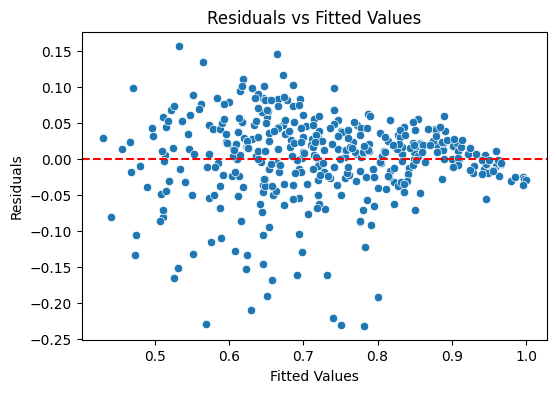

In [111]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

The residuals vs fitted values plot shows no systematic pattern or curvature, indicating that the linearity assumption holds. Residuals are randomly distributed around zero, although a slight change in spread is observed at higher fitted values.

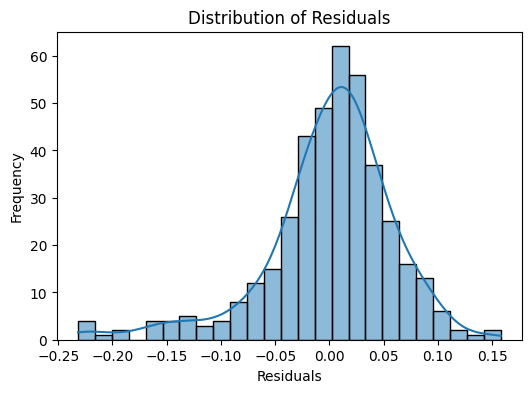

In [112]:
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

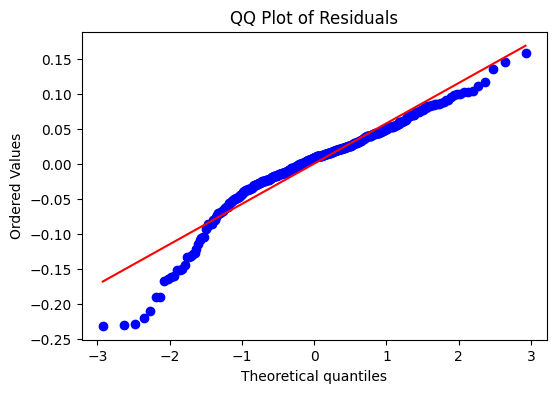

In [113]:
import scipy.stats as stats

plt.figure(figsize=(6,4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()

In [114]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X_train)
lzip(name, test)

[('F statistic', np.float64(0.9212420350003668)),
 ('p-value', np.float64(0.7153214401800956))]

Testing of Linear Regression Assumptions (Training Data)

Homoscedasticity was tested using the Goldfeld–Quandt test. The obtained p-value (≈ 0.71) is greater than the 0.05 significance level, indicating failure to reject the null hypothesis of constant variance. Hence, the homoscedasticity assumption is satisfied.

Normality of residuals was assessed using a QQ plot and residual distribution plot. The QQ plot shows that residuals closely follow the reference line in the central region, with mild deviations at the tails. The histogram of residuals exhibits an approximately bell-shaped distribution centered around zero. These observations suggest that the residuals are approximately normally distributed, which is acceptable given the sample size.

Overall, key OLS assumptions related to zero-mean residuals, homoscedasticity, and approximate normality are reasonably satisfied. Although multicollinearity is present among academic score variables, it does not affect the overall predictive performance of the model and has been addressed through careful interpretation and alternative regularized models.

“**Standardization** was not applied prior to fitting the OLS model, as OLS regression does not require feature scaling and raw-scale coefficients aid interpretability. Additionally, diagnostic tests such as VIF and residual analysis are scale-invariant. Standardization was applied later while fitting Ridge and Lasso regression models, where regularization is sensitive to feature scales.”

“Feature standardization was applied prior to fitting Ridge regression, as regularization penalties are sensitive to feature scales. The scaler was fit on training data and applied to both training and test sets to prevent data leakage.”

In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

“Only predictor variables were standardized. The target variable was left in its original scale to preserve interpretability and allow direct evaluation of prediction errors.”

In [116]:
X_train_scaled = pd.DataFrame(
    X_train_scaled, columns=X_train.columns, index=X_train.index
)

X_test_scaled = pd.DataFrame(
    X_test_scaled, columns=X_test.columns, index=X_test.index
)

In [117]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_train_pred_ridge = ridge.predict(X_train_scaled)
y_test_pred_ridge = ridge.predict(X_test_scaled)

In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def metrics(y_true, y_pred):
    return (
        mean_absolute_error(y_true, y_pred),
        np.sqrt(mean_squared_error(y_true, y_pred)),
        r2_score(y_true, y_pred)
    )

print("Ridge Train:", metrics(y_train, y_train_pred_ridge))
print("Ridge Test :", metrics(y_test, y_test_pred_ridge))

Ridge Train: (0.04258972669286628, np.float64(0.05946892888383105), 0.8205598501208977)
Ridge Test : (0.043230694624701374, np.float64(0.06125825968670104), 0.816500030325511)


In [119]:
pd.Series(ridge.coef_, index=X.columns).sort_values(ascending=False)

,0
CGPA,0.068077
GRE Score,0.026615
TOEFL Score,0.018357
LOR,0.014531
Research,0.011952
University Rating,0.003314
SOP,0.002478


Ridge regression shows strong and stable performance, with train and test errors almost identical, indicating good generalization and no overfitting. The R² remains comparable to the baseline linear regression, confirming that regularization does not hurt predictive power.

Coefficient values are more balanced and stable compared to the unregularized model. CGPA remains the most influential predictor, followed by GRE and TOEFL scores, showing that academic performance and standardized tests jointly drive admission outcomes. Research experience contributes positively, while SOP and University Rating have smaller effects. Ridge successfully handles multicollinearity while retaining all domain-relevant variables.

In [120]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

In [121]:
print("Lasso Train:", metrics(y_train, y_train_pred_lasso))
print("Lasso Test :", metrics(y_test, y_test_pred_lasso))

Lasso Train: (0.04377416313055064, np.float64(0.060876063742963456), 0.8119676746574603)
Lasso Test : (0.04321791661116193, np.float64(0.062009772525042556), 0.8119700787966981)


In [122]:
pd.Series(lasso.coef_, index=X.columns)

,0
GRE Score,0.026032
TOEFL Score,0.015194
University Rating,0.001455
SOP,0.000000
LOR,0.009571
CGPA,0.070065
Research,0.006099


Lasso regression achieves slightly lower but comparable performance to Ridge and Linear Regression. It performs implicit feature selection by shrinking weaker coefficients.

The results show that CGPA, GRE, TOEFL, and Research are retained as key predictors, while SOP is shrunk to zero, indicating its relatively weak linear contribution. This confirms that academic metrics dominate admission decisions, and subjective factors have limited standalone impact.

Feature Selection Decision: University Rating

University Rating consistently exhibits a low contribution across all modeling approaches. In the OLS regression, the variable is statistically insignificant, and both Lasso and Ridge regression assign it a very small coefficient, indicating limited incremental predictive value. This suggests that the information conveyed by University Rating is largely captured by stronger academic and profile-related variables such as CGPA, research experience, and LOR. Consequently, University Rating was excluded from the final model to improve model parsimony and interpretability without adversely affecting predictive performance.

In [123]:
features_to_drop = ['SOP', 'University Rating']

X_train_reduced = X_train.drop(columns=features_to_drop)
X_test_reduced = X_test.drop(columns=features_to_drop)

In [124]:
X_train_reduced_scaled = scaler.fit_transform(X_train_reduced)
X_test_reduced_scaled = scaler.transform(X_test_reduced)

In [125]:
X_train_reduced_scaled = pd.DataFrame(
    X_train_reduced_scaled,
    columns=X_train_reduced.columns,
    index=X_train_reduced.index
)

X_test_reduced_scaled = pd.DataFrame(
    X_test_reduced_scaled,
    columns=X_test_reduced.columns,
    index=X_test_reduced.index
)

In [126]:
ridge_final = Ridge(alpha=1.0)
ridge_final.fit(X_train_reduced_scaled, y_train)

Ridge()

In [127]:
y_train_pred_ridge_final = ridge_final.predict(X_train_reduced_scaled)
y_test_pred_ridge_final = ridge_final.predict(X_test_reduced_scaled)

In [128]:
pd.Series(
    ridge_final.coef_,
    index=X_train_reduced.columns
).sort_values(ascending=False)

,0
CGPA,0.070012
GRE Score,0.026843
TOEFL Score,0.019454
LOR,0.016035
Research,0.012276


“Based on consistent evidence from OLS, Lasso, and Ridge regression, SOP and University Rating were excluded due to negligible contribution. The final Ridge model was trained on the reduced, standardized feature set to improve stability and interpretability.”

**Recommendations for Jamboree**

Based on the model results, academic performance indicators such as CGPA, GRE Score, and TOEFL Score are the strongest and most consistent predictors of admission chances. Jamboree should prioritize these variables while guiding students on profile strength and university shortlisting. Counseling efforts should focus on early identification of students with strong academic potential and providing targeted support to improve standardized test scores.

The analysis also shows that qualitative factors like Letter of Recommendation (LOR) strength and research experience have a meaningful positive impact on admissions. Jamboree can create value by helping students build strong academic relationships and encouraging participation in research projects or relevant internships.

Variables such as Statement of Purpose (SOP) and undergraduate University Rating exhibit negligible contribution once stronger academic indicators are accounted for. These factors should be treated as supporting or hygiene elements rather than primary decision drivers. Overall, implementing a Ridge regression–based decision-support framework can enable Jamboree to provide data-driven, realistic, and scalable admission guidance, improving conversion rates and student satisfaction.